In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten, Dropout

Load your dataset

In [117]:
data = pd.read_csv("2w.csv")

Features and Target variables

In [118]:
features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_2W','%_of_3W','%_of_4W']].values
target = data['SD'].values

Normalize data

In [119]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

Split data into train and test sets

In [120]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Reshape the input data for all models

In [121]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Define, Create and Evaluate Model

In [122]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    # model.add(Dropout(0.2))
    model.add(LSTM(48, activation='relu', return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_model = create_lstm_model()
lstm_model.fit(X_train_lstm, y_train, epochs=500, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

Epoch 1/500
24/24 [==============================] - 2s 21ms/step - loss: nan - val_loss: nan
Epoch 2/500
24/24 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 3/500
24/24 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 4/500
24/24 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 5/500
24/24 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 6/500
24/24 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 7/500
24/24 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 8/500
24/24 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 9/500
24/24 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 10/500
24/24 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 11/500
24/24 [==============================] - 0s 5ms/step - 

ValueError: Input contains NaN.

Visualize LSTM results

0.7721105940874742


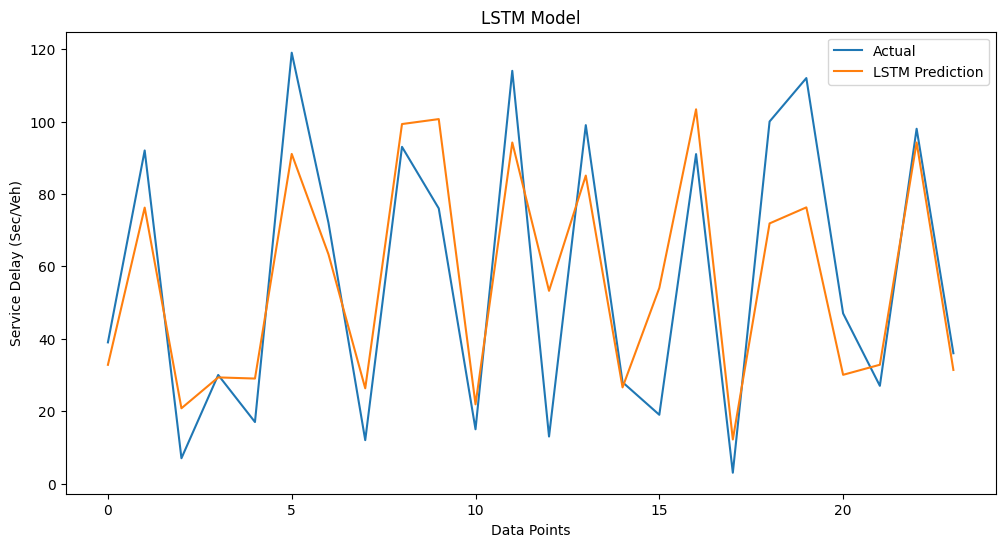

In [ ]:
print(r2_lstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('LSTM Model')
plt.show()

In [ ]:
def create_bilstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bilstm_model = create_bilstm_model()
bilstm_model.fit(X_train_lstm, y_train, epochs=192, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bilstm = bilstm_model.predict(X_test_lstm)
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
rmse_bilstm=np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test, y_pred_bilstm)


Epoch 1/192
3/3 [==============================] - 3s 182ms/step - loss: 4292.3076 - val_loss: 4749.6582
Epoch 2/192
3/3 [==============================] - 0s 15ms/step - loss: 4285.5151 - val_loss: 4741.9673
Epoch 3/192
3/3 [==============================] - 0s 15ms/step - loss: 4277.1963 - val_loss: 4731.9434
Epoch 4/192
3/3 [==============================] - 0s 15ms/step - loss: 4266.0996 - val_loss: 4717.4077
Epoch 5/192
3/3 [==============================] - 0s 16ms/step - loss: 4249.5781 - val_loss: 4695.1597
Epoch 6/192
3/3 [==============================] - 0s 14ms/step - loss: 4224.4023 - val_loss: 4659.0562
Epoch 7/192
3/3 [==============================] - 0s 16ms/step - loss: 4178.8911 - val_loss: 4596.1870
Epoch 8/192
3/3 [==============================] - 0s 15ms/step - loss: 4104.4785 - val_loss: 4476.0728
Epoch 9/192
3/3 [==============================] - 0s 16ms/step - loss: 3947.5132 - val_loss: 4213.3130
Epoch 10/192
3/3 [==============================] - 0s 19ms/ste

Visualize BiLSTM results

0.4925413910612211


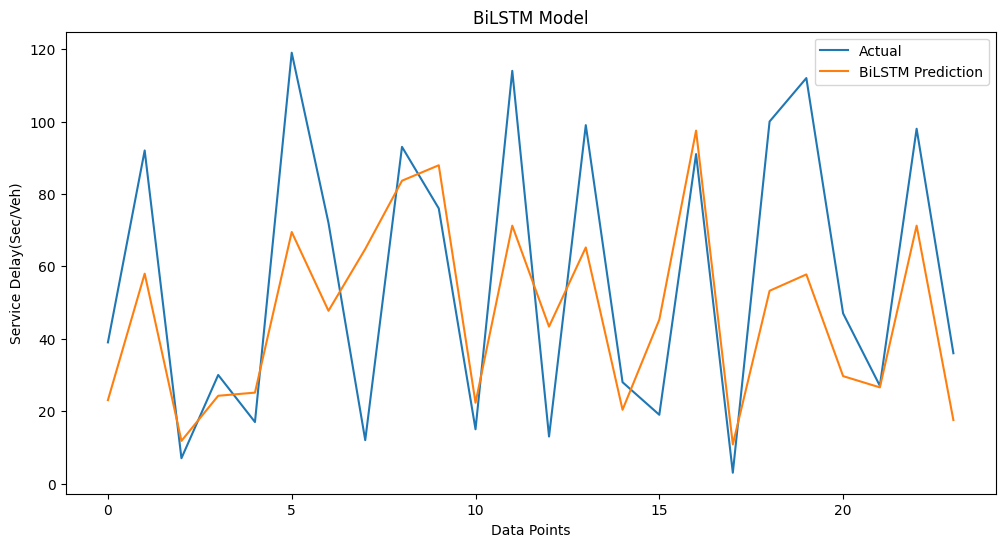

In [ ]:
print(r2_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bilstm, label='BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay(Sec/Veh)')
plt.legend()
plt.title('BiLSTM Model')
plt.show()

In [ ]:
def create_gru_model():
    model = Sequential()
    model.add(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    model.add(GRU(48, activation='relu', return_sequences=False))  
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

gru_model = create_gru_model()
gru_model.fit(X_train_lstm, y_train, epochs=192, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_gru = gru_model.predict(X_test_lstm)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru=np.sqrt(mse_gru)
r2_gru = r2_score(y_test, y_pred_gru)

Epoch 1/192
3/3 [==============================] - 2s 132ms/step - loss: 4294.1104 - val_loss: 4752.0376
Epoch 2/192
3/3 [==============================] - 0s 16ms/step - loss: 4288.3613 - val_loss: 4746.4858
Epoch 3/192
3/3 [==============================] - 0s 18ms/step - loss: 4282.7183 - val_loss: 4739.8618
Epoch 4/192
3/3 [==============================] - 0s 15ms/step - loss: 4275.8257 - val_loss: 4731.6909
Epoch 5/192
3/3 [==============================] - 0s 16ms/step - loss: 4267.0132 - val_loss: 4721.0830
Epoch 6/192
3/3 [==============================] - 0s 16ms/step - loss: 4255.8267 - val_loss: 4706.4121
Epoch 7/192
3/3 [==============================] - 0s 15ms/step - loss: 4238.8516 - val_loss: 4684.8965
Epoch 8/192
3/3 [==============================] - 0s 16ms/step - loss: 4215.6348 - val_loss: 4651.5371
Epoch 9/192
3/3 [==============================] - 0s 16ms/step - loss: 4177.6826 - val_loss: 4598.0703
Epoch 10/192
3/3 [==============================] - 0s 16ms/ste

Visualize GRU results

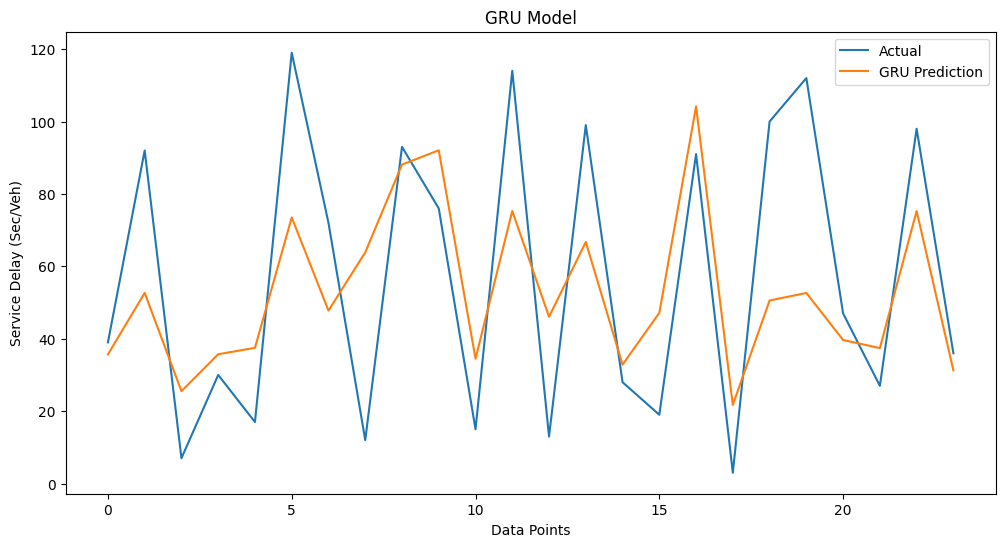

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_gru, label='GRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('GRU Model')
plt.show()

In [ ]:
def create_bigru_model():
    model = Sequential()
    model.add(Bidirectional(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(GRU(48, activation='relu', return_sequences=False))) 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bigru_model = create_bigru_model()
bigru_model.fit(X_train_lstm, y_train, epochs=192, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bigru = bigru_model.predict(X_test_lstm)
mae_bigru = mean_absolute_error(y_test, y_pred_bigru)
mse_bigru = mean_squared_error(y_test, y_pred_bigru)
rmse_bigru=np.sqrt(mse_bigru)
r2_bigru = r2_score(y_test, y_pred_bigru)

Epoch 1/192
3/3 [==============================] - 3s 173ms/step - loss: 4291.0156 - val_loss: 4743.8242
Epoch 2/192
3/3 [==============================] - 0s 16ms/step - loss: 4277.3643 - val_loss: 4731.5371
Epoch 3/192
3/3 [==============================] - 0s 15ms/step - loss: 4265.6934 - val_loss: 4716.7744
Epoch 4/192
3/3 [==============================] - 0s 16ms/step - loss: 4249.8135 - val_loss: 4697.4189
Epoch 5/192
3/3 [==============================] - 0s 16ms/step - loss: 4228.7319 - val_loss: 4670.6479
Epoch 6/192
3/3 [==============================] - 0s 16ms/step - loss: 4198.5576 - val_loss: 4632.0391
Epoch 7/192
3/3 [==============================] - 0s 16ms/step - loss: 4156.3379 - val_loss: 4575.1245
Epoch 8/192
3/3 [==============================] - 0s 15ms/step - loss: 4088.2346 - val_loss: 4489.1226
Epoch 9/192
3/3 [==============================] - 0s 15ms/step - loss: 3992.4192 - val_loss: 4353.1226
Epoch 10/192
3/3 [==============================] - 0s 16ms/ste

Visualize BiGRU results

0.5853755348212124


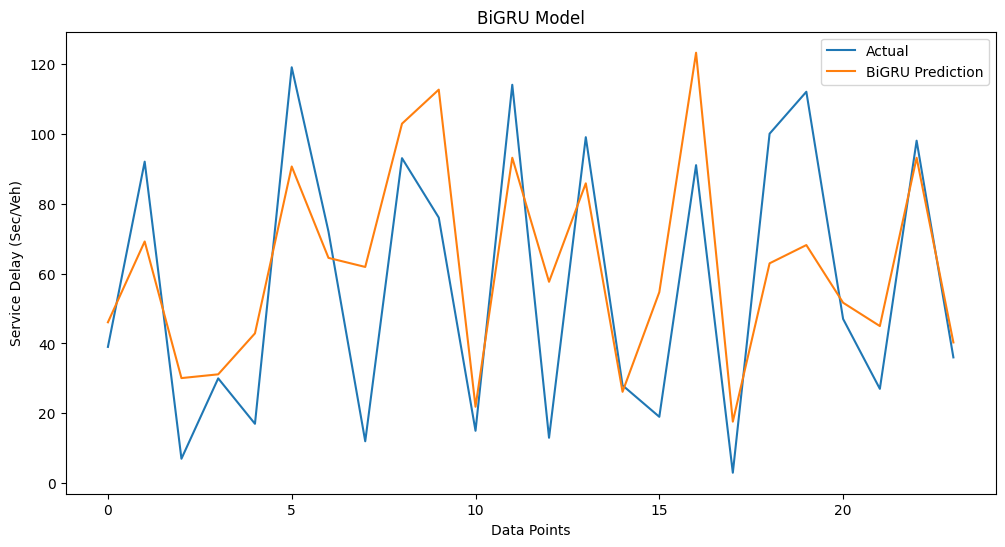

In [ ]:
print(r2_bigru)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bigru, label='BiGRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('BiGRU Model')
plt.show()

In [ ]:
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_model = create_cnn_model()
cnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=300, batch_size=64, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test), verbose=1)

y_pred_cnn = cnn_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn=np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)

Epoch 1/300
2/2 [==============================] - 0s 91ms/step - loss: 4288.9170 - val_loss: 4741.4409
Epoch 2/300
2/2 [==============================] - 0s 20ms/step - loss: 4278.5317 - val_loss: 4731.3926
Epoch 3/300
2/2 [==============================] - 0s 20ms/step - loss: 4268.0532 - val_loss: 4719.6382
Epoch 4/300
2/2 [==============================] - 0s 20ms/step - loss: 4256.4214 - val_loss: 4705.9419
Epoch 5/300
2/2 [==============================] - 0s 20ms/step - loss: 4242.5215 - val_loss: 4690.4395
Epoch 6/300
2/2 [==============================] - 0s 20ms/step - loss: 4227.0713 - val_loss: 4672.9409
Epoch 7/300
2/2 [==============================] - 0s 21ms/step - loss: 4209.1558 - val_loss: 4653.1782
Epoch 8/300
2/2 [==============================] - 0s 27ms/step - loss: 4189.4580 - val_loss: 4630.7407
Epoch 9/300
2/2 [==============================] - 0s 22ms/step - loss: 4166.9116 - val_loss: 4605.3394
Epoch 10/300
2/2 [==============================] - 0s 24ms/step

Visualize CNN results

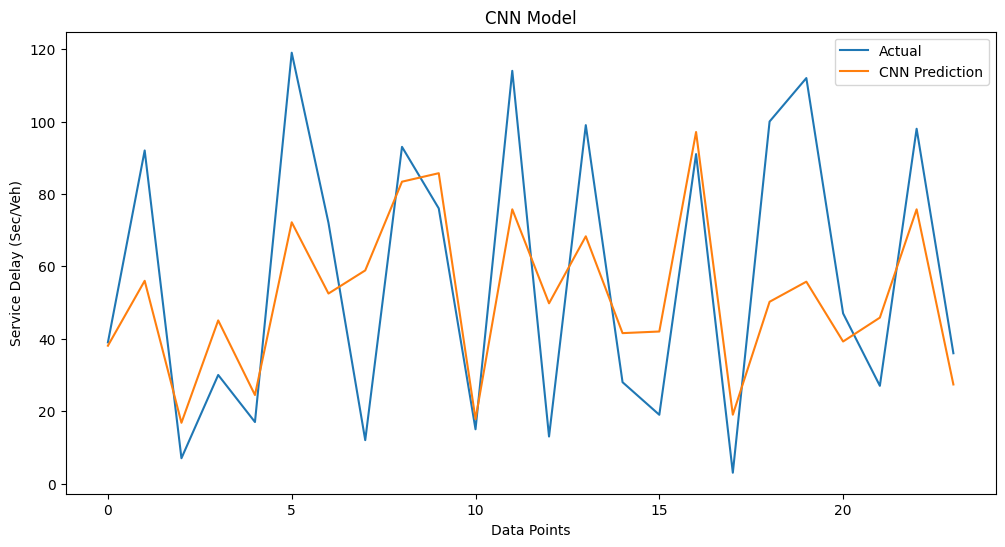

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn, label='CNN Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN Model')
plt.show()

In [ ]:
def create_cnn_lstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_lstm_model = create_cnn_lstm_model()
cnn_lstm_model.fit(X_train_lstm, y_train, epochs=300, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_lstm)
mae_cnn_lstm = mean_absolute_error(y_test, y_pred_cnn_lstm)
mse_cnn_lstm = mean_squared_error(y_test, y_pred_cnn_lstm)
rmse_cnn_lstm=np.sqrt(mse_cnn_lstm)
r2_cnn_lstm = r2_score(y_test, y_pred_cnn_lstm)

Epoch 1/300
3/3 [==============================] - 1s 82ms/step - loss: 4289.4941 - val_loss: 4745.1802
Epoch 2/300
3/3 [==============================] - 0s 13ms/step - loss: 4280.4556 - val_loss: 4735.5229
Epoch 3/300
3/3 [==============================] - 0s 12ms/step - loss: 4270.1318 - val_loss: 4724.4575
Epoch 4/300
3/3 [==============================] - 0s 13ms/step - loss: 4258.8223 - val_loss: 4711.5850
Epoch 5/300
3/3 [==============================] - 0s 13ms/step - loss: 4245.4688 - val_loss: 4695.6870
Epoch 6/300
3/3 [==============================] - 0s 13ms/step - loss: 4228.1240 - val_loss: 4675.1196
Epoch 7/300
3/3 [==============================] - 0s 14ms/step - loss: 4205.4502 - val_loss: 4647.7222
Epoch 8/300
3/3 [==============================] - 0s 13ms/step - loss: 4175.2373 - val_loss: 4609.7129
Epoch 9/300
3/3 [==============================] - 0s 14ms/step - loss: 4134.3882 - val_loss: 4554.6597
Epoch 10/300
3/3 [==============================] - 0s 15ms/step

Visualize CNN_LSTM results

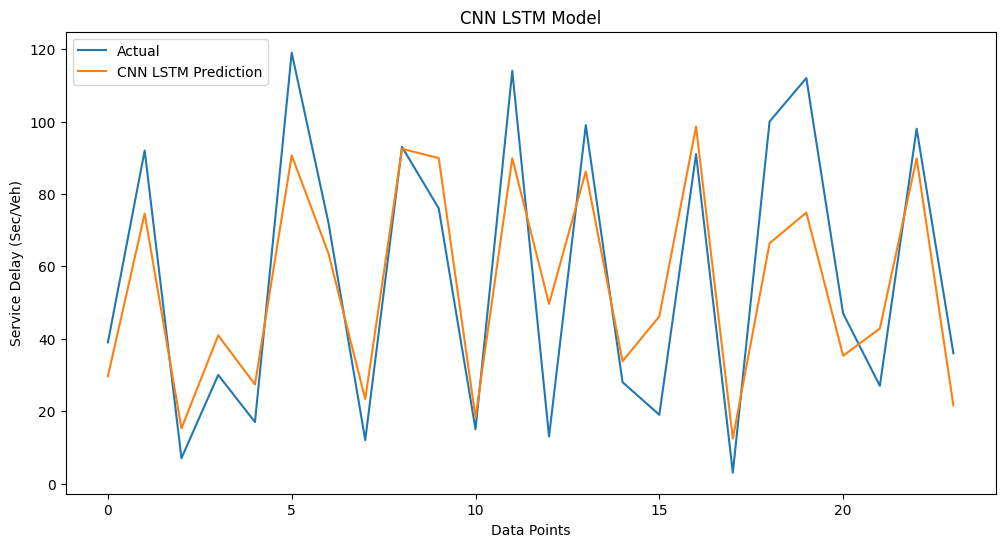

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_lstm, label='CNN LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN LSTM Model')
plt.show()

In [ ]:
def create_cnn_bilstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Bidirectional(LSTM(50, activation='relu')))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_bilstm_model = create_cnn_bilstm_model()
cnn_bilstm_model.fit(X_train_lstm, y_train, epochs=300, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_lstm)
mae_cnn_bilstm = mean_absolute_error(y_test, y_pred_cnn_bilstm)
mse_cnn_bilstm = mean_squared_error(y_test, y_pred_cnn_bilstm)
rmse_cnn_bilstm=np.sqrt(mse_cnn_bilstm)
r2_cnn_bilstm = r2_score(y_test, y_pred_cnn_bilstm)

Epoch 1/300
3/3 [==============================] - 2s 128ms/step - loss: 4295.9697 - val_loss: 4750.7192
Epoch 2/300
3/3 [==============================] - 0s 14ms/step - loss: 4285.3145 - val_loss: 4740.3828
Epoch 3/300
3/3 [==============================] - 0s 16ms/step - loss: 4275.0972 - val_loss: 4729.9058
Epoch 4/300
3/3 [==============================] - 0s 20ms/step - loss: 4264.7100 - val_loss: 4717.8267
Epoch 5/300
3/3 [==============================] - 0s 18ms/step - loss: 4251.2905 - val_loss: 4702.9497
Epoch 6/300
3/3 [==============================] - 0s 21ms/step - loss: 4236.0312 - val_loss: 4683.6152
Epoch 7/300
3/3 [==============================] - 0s 19ms/step - loss: 4215.4814 - val_loss: 4657.7856
Epoch 8/300
3/3 [==============================] - 0s 14ms/step - loss: 4186.6748 - val_loss: 4622.1523
Epoch 9/300
3/3 [==============================] - 0s 17ms/step - loss: 4145.7744 - val_loss: 4571.4722
Epoch 10/300
3/3 [==============================] - 0s 14ms/ste

Visualize CNN_BiLSTM results

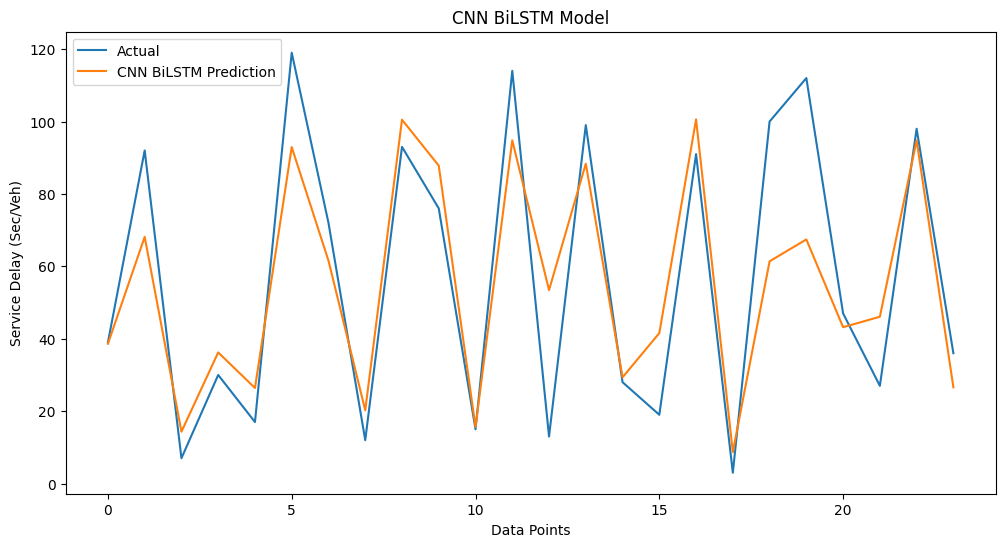

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_bilstm, label='CNN BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN BiLSTM Model')
plt.show()

Visualize metrics

In [ ]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

Plot MAE

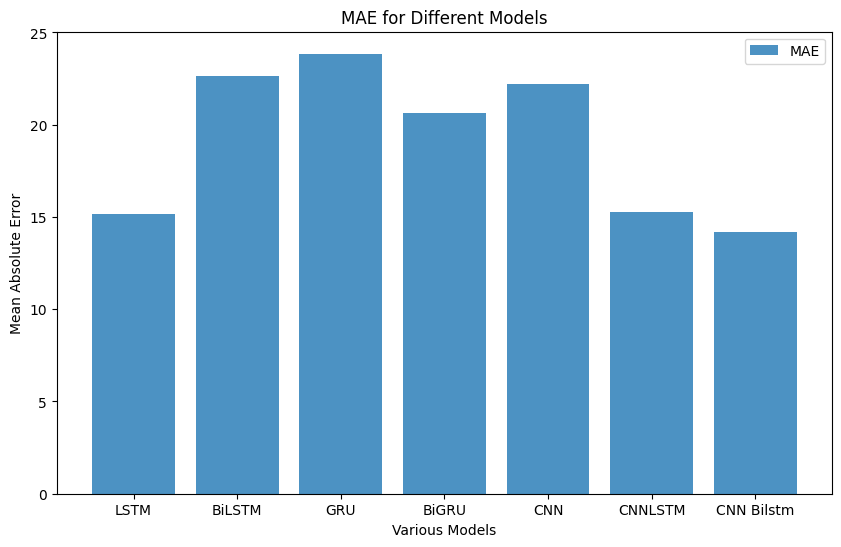

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, alpha=0.8, label='MAE')
plt.title('MAE for Different Models')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Various Models')
plt.legend()
plt.show()

Plot MSE

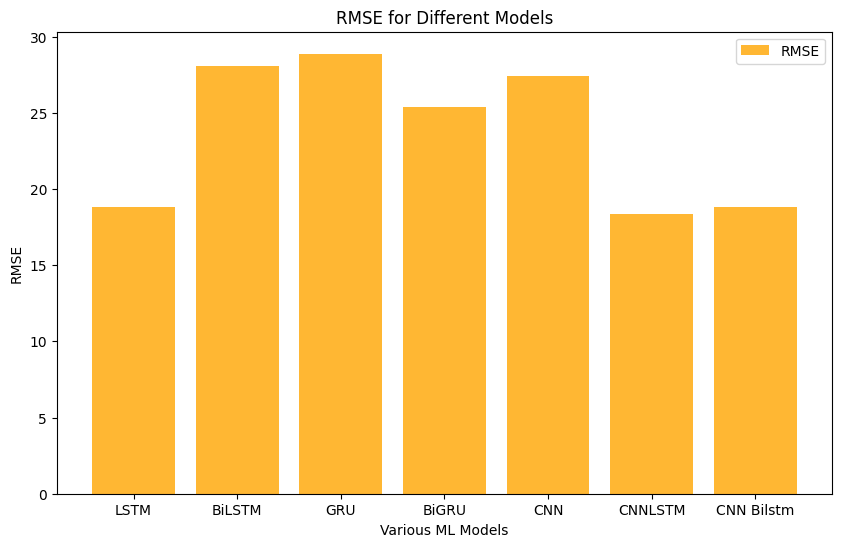

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, alpha=0.8, label='RMSE', color='orange')
plt.title('RMSE for Different Models')
plt.ylabel('RMSE')
plt.xlabel('Various ML Models')
plt.legend()
plt.show()

Plot R2 Score

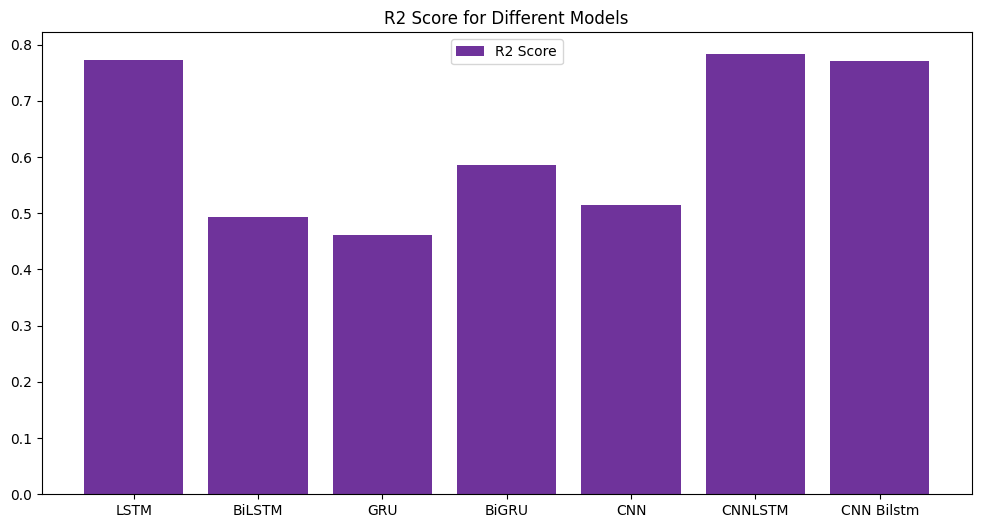

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, alpha=0.8, label='R2 Score', color='indigo')
plt.title('R2 Score for Different Models')
plt.legend()
plt.show()

Print Metrics

In [ ]:
print("LSTM MAE:", mae_lstm)
print("LSTM MSE:", rmse_lstm)
print("LSTM R2 Score:", r2_lstm)
print(end="\n")
print("BiLSTM MAE:", mae_bilstm)
print("BiLSTM MSE:", rmse_bilstm)
print("BiLSTM R2 Score:", r2_bilstm)
print(end="\n")
print("GRU MAE:", mae_gru)
print("GRU MSE:", rmse_gru)
print("GRU R2 Score:", r2_gru)
print(end="\n")
print("BiGRU MAE:", mae_bigru)
print("BiGRU MSE:", rmse_bigru)
print("BiGRU R2 Score:", r2_bigru)
print(end="\n")
print("CNN MAE:", mae_cnn)
print("CNN MSE:", rmse_cnn)
print("CNN R2 Score:", r2_cnn)
print(end="\n")
print("CNN LSTM MAE:", mae_cnn_lstm)
print("CNN LSTM MSE:", rmse_cnn_lstm)
print("CNN LSTM R2 Score:", r2_cnn_lstm)
print(end="\n")
print("CNN BiLSTM MAE:", mae_cnn_bilstm)
print("CNN BiLSTM MSE:", rmse_cnn_bilstm)
print("CNN BiLSTM R2 Score:", r2_cnn_bilstm)

LSTM MAE: 15.178156892458597
LSTM MSE: 18.79226051482747
LSTM R2 Score: 0.7721105940874742

BiLSTM MAE: 22.620406945546467
BiLSTM MSE: 28.04253487016993
BiLSTM R2 Score: 0.4925413910612211

GRU MAE: 23.848892370859783
GRU MSE: 28.87010742442525
GRU R2 Score: 0.4621478769817534

BiGRU MAE: 20.61868127187093
BiGRU MSE: 25.348042022309983
BiGRU R2 Score: 0.5853755348212124

CNN MAE: 22.18802245457967
CNN MSE: 27.411208486560508
CNN R2 Score: 0.5151331941895929

CNN LSTM MAE: 15.272983312606812
CNN LSTM MSE: 18.341238127929795
CNN LSTM R2 Score: 0.782918213829855

CNN BiLSTM MAE: 14.169577916463217
CNN BiLSTM MSE: 18.829712356607878
CNN BiLSTM R2 Score: 0.7712013492719881


Plot predictions for each model

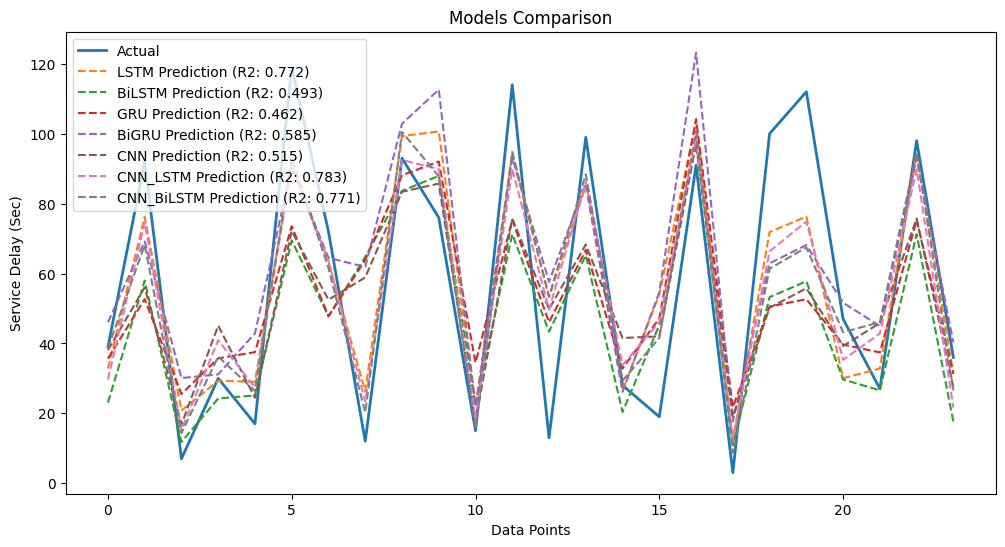

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(y_pred_lstm, label=f'LSTM Prediction (R2: {r2_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_bilstm, label=f'BiLSTM Prediction (R2: {r2_bilstm:.3f})', linestyle='dashed')
plt.plot(y_pred_gru, label=f'GRU Prediction (R2: {r2_gru:.3f})', linestyle='dashed')
plt.plot(y_pred_bigru, label=f'BiGRU Prediction (R2: {r2_bigru:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn, label=f'CNN Prediction (R2: {r2_cnn:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_lstm, label=f'CNN_LSTM Prediction (R2: {r2_cnn_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_bilstm, label=f'CNN_BiLSTM Prediction (R2: {r2_cnn_bilstm:.3f})', linestyle='dashed')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec)')
plt.legend()
plt.title('Models Comparison')
plt.show()

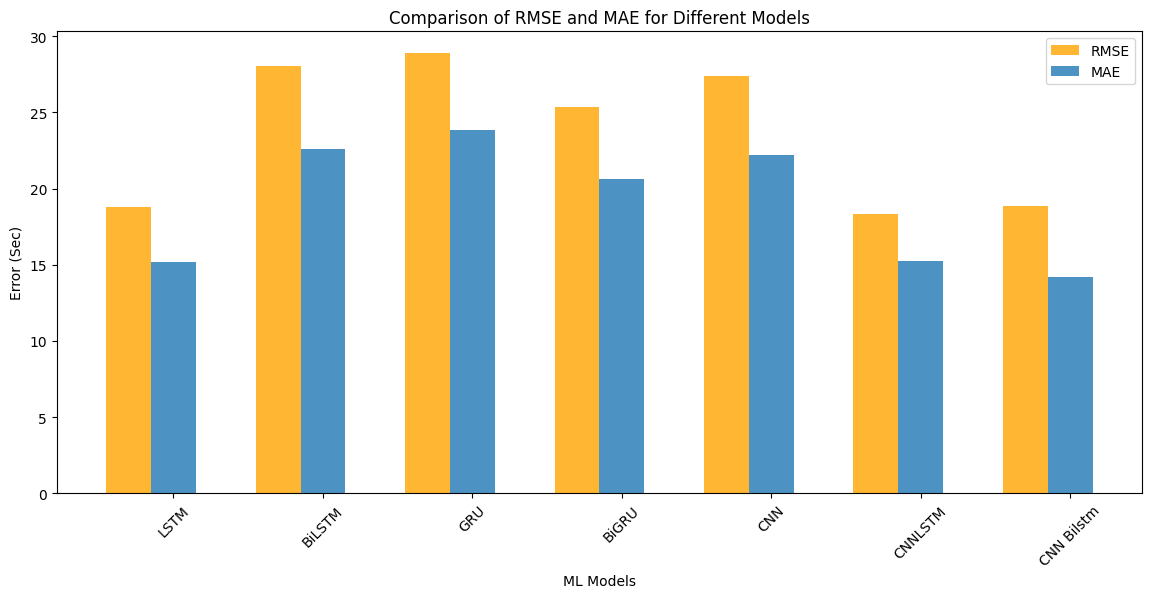

In [ ]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

bar_width = 0.3
index = np.arange(len(models))

plt.figure(figsize=(14, 6))

# Plot MSE
plt.bar(index, mse_values, width=bar_width, alpha=0.8, label='RMSE', color='orange')

# Plot MAE
plt.bar(index + bar_width, mae_values, width=bar_width, alpha=0.8, label='MAE')

# Plot R2
#plt.bar(index + 2*bar_width, r2_values, width=bar_width, alpha=0.8, label='R2')

plt.xlabel('ML Models')
plt.ylabel('Error (Sec)')
plt.title('Comparison of RMSE and MAE for Different Models')
plt.xticks(index + bar_width, models, rotation=45)
plt.legend()

plt.show()